In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/summer21/new/src/data/mux

/content/drive/My Drive/summer21/new/src/data/mux


In [3]:
!pip install bitstring

In [4]:
s = 2
n = 2 ** s
r = 1

In [5]:
from bitstring import BitArray

def mux(X, s, n):

    return np.array([x[s:][BitArray(x[:s]).uint] for x in X])

In [6]:
import numpy as np

# X = np.random.randint(low=0, high=2, size=(3 * 2 ** (s + n), s + n + r))

arr, X = [[0], [1]], []

for x in arr:
    arr.append(x + [0])
    arr.append(x + [1])

    if len(x) == s + n + r:
        X.append(x)
    
    if len(X) == 2 ** (s + n + r):
        break

In [7]:
y = mux(X, s, n)

In [8]:
import pandas as pd

data = pd.DataFrame(X, columns=['S' + str(i) for i in range(s)] + ['I' + str(i) for i in range(n)] + ['R' + str(i) for i in range(r)])
data.insert(loc=0, column='y', value=y)
data

,y,S0,S1,I0,I1,I2,I3,R0
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,1
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
123,1,1,1,1,1,0,1,1
124,0,1,1,1,1,1,0,0
125,0,1,1,1,1,1,0,1
126,1,1,1,1,1,1,1,0


In [9]:
from sklearn.model_selection import train_test_split

train_test, validate = train_test_split(data, test_size=0.33)
train, test = train_test_split(train_test, test_size=0.5)

In [10]:
train.shape, test.shape, validate.shape

((42, 8), (43, 8), (43, 8))

In [12]:
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.neighbors import * 
from sklearn.svm import *

model = RandomForestClassifier(random_state=0)
model.fit(data.values[:,1:], data.values[:,0])
model.score(data.values[:,1:], data.values[:,0])

1.0

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(model.predict(train.values[:,1:]), train.values[:,0], output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,1.0,1.0,1.0,692.0
1,1.0,1.0,1.0,680.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1372.0
weighted avg,1.0,1.0,1.0,1372.0


In [ ]:
important = np.array([sample for sample in test.values if BitArray(sample[1:s + 1]).uint in (0, 1, 4, 5)])
not_important = np.array([sample for sample in test.values if BitArray(sample[1:s + 1]).uint not in (0, 1, 4, 5)])

In [ ]:
model.score(important[:,1:], important[:,0])

0.9755395683453237

In [ ]:
model.score(not_important[:,1:], not_important[:,0])

0.7828655834564254

In [ ]:
model.predict([[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

array([1])

In [13]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(model, data.values[:,1:], data.values[:,0], n_repeats=100).importances_mean

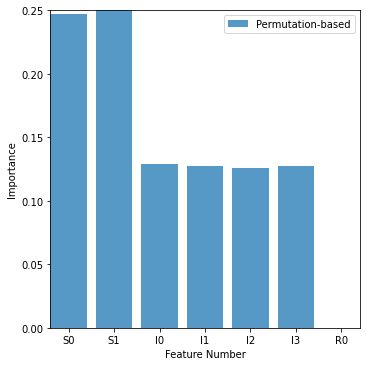

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(data.columns[1:], importance, label='Permutation-based', alpha=0.75)
# ax.bar(data.columns[1:], model.feature_importances_, label='Impurity-based', alpha=0.75)
ax.legend(loc='upper right')
ax.autoscale(tight=True)
ax.set_xticklabels(data.columns[1:])

fig.tight_layout()

plt.xlabel('Feature Number'), plt.ylabel('Importance')
plt.show()

In [15]:
with open('mux_train.csv', 'w+') as f:
    f.write(data.to_csv())

In [16]:
with open('mux_test.csv', 'w+') as f:
    f.write(data.to_csv())

In [17]:
with open('mux_validate.csv', 'w+') as f:
    f.write(data.to_csv())

In [ ]:
from sklearn.neural_network import *

model = MLPClassifier(random_state=0, max_iter=1000)
model.fit(data.drop(), )

NameError: ignored